# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

**TODO: Insert your surname, name and ID number**

Student surname: Giorgetti

Student name: Sabrina
    
ID: 2013375

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import pandas as pd #added
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2003300 #changed 
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [54 52 59 52 61 58 73 62 60 69]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [54 52 59 52 61 58 73 62 60 69]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


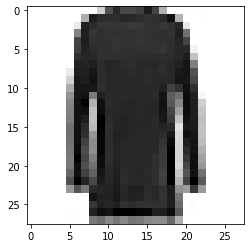

LABEL: 3
INPUT:


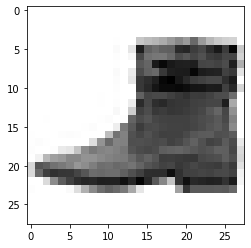

LABEL: 9
INPUT:


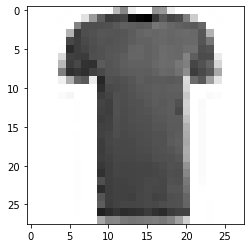

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20) ]} 
##suggested layer
##kernal layers

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1) 

##max_iter and tol controls when to stop of iteration
##random state to use to get the same result every time you run 

#ADD YOUR CODE
grid = GridSearchCV(mlp, parameters, n_jobs=-1, cv=5) #check n_jobs=-1
grid.fit(X_train,y_train)
result_df = pd.DataFrame(grid.cv_results_)
#print(result_df)


print ('RESULTS FOR NN\n')

print("Best parameters set found:", grid.best_params_ ) #ADD YOUR CODE

print("Score with best parameters:", "{0:0.3f}".format(grid.best_score_)) #ADD YOUR CODE

print("\nAll scores on the grid: \n", result_df[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score','mean_test_score','rank_test_score']]) # ADD YOUR CODE
print("\n") 



##score --> accuracy number of correct classifier  
##error = 1-score = 1-accuracy 



RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (20,)}
Score with best parameters: 0.745

All scores on the grid: 
                                  params  split0_test_score  split1_test_score  \
0         {'hidden_layer_sizes': (10,)}           0.666667           0.716667   
1         {'hidden_layer_sizes': (20,)}           0.741667           0.791667   
2         {'hidden_layer_sizes': (30,)}           0.741667           0.800000   
3      {'hidden_layer_sizes': (20, 20)}           0.750000           0.700000   
4  {'hidden_layer_sizes': (30, 30, 20)}           0.683333           0.708333   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.708333           0.741667           0.733333         0.713333   
1           0.725000           0.783333           0.683333         0.745000   
2           0.708333           0.741667           0.650000         0.728333   
3           0.716667           0.783333           0.458333     

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE - ##keeping the best NN architecture you have found above
mlp_batch = MLPClassifier(hidden_layer_sizes=(20,), max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1) 

grid_batch= GridSearchCV(mlp_batch, param_grid=parameters, n_jobs=-1, cv=kf)
# recall to use cv=kf to use the k-fold subdivision seen in the lectures

grid_batch.fit(X_train,y_train)
result_batch_df = pd.DataFrame(grid_batch.cv_results_)
print(result_batch_df)

#ADD YOUR CODE

print ('\nRESULTS FOR NN\n')

print("Best parameters set found:", grid_batch.best_params_)#ADD YOUR CODE

print("Score with best parameters:", "{0:0.3f}".format(grid_batch.best_score_)) #ADD YOUR CODE

print("\nAll scores on the grid:\n", result_batch_df[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score','mean_test_score','rank_test_score']]) # ADD YOUR CODE
print("\n") 



   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      40.767067     12.496317         0.002608        0.002054   
1       3.373017      1.070924         0.004776        0.003334   
2       1.930371      0.594963         0.002563        0.000344   

  param_batch_size               params  split0_test_score  split1_test_score  \
0                1    {'batch_size': 1}           0.108333           0.091667   
1               32   {'batch_size': 32}           0.725000           0.758333   
2              480  {'batch_size': 480}           0.716667           0.808333   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.091667           0.166667           0.066667         0.105000   
1           0.750000           0.741667           0.658333         0.726667   
2           0.750000           0.766667           0.675000         0.743333   

   std_test_score  rank_test_score  
0        0.033582                3  
1        0.0359

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

Running the algorithm for different architectures and batch sizes we observe different results in the training accuracy. The best results for different number of layers and size is given by “hidden_layer_sizes':(20,)” with a score of 0.745. Between the different architectures tried, the best ones are those with just one hidden layer : 

<br>
-{'hidden_layer_sizes': (10,)} ranked as 3   <br>    
-{'hidden_layer_sizes': (30,)} ranked as 2 <br>
-{'hidden_layer_sizes': (20, 20)} ranked as 4 <br>
-{'hidden_layer_sizes': (30, 30, 20)} ranked as 5 <br>
<br>
it’s not needed for this problem a too complicated architecture as (20, 20) or (20,30,20). <br>
As regards the different batch sizes, between the baseline SGD, the mini-batch size and the standard SG the one that works better is the last one, corresponding to the best parameter found of {'batch_size': 480} with a score equal to 0.743. In the other two cases we get: <br>

-{'batch_size': 32}: score=0.726, ranked as 2 <br>
-{'batch_size': 1}: score=0.10, ranked as 3 <br>

so the worst performing one, with a really low score, is the baseline SGD. For different batch sizes the training convergence can change: with a smaller batch size (as 1) each iteration is faster, since the gradient can be computed from just one single sample, but the trajectory is less stable, and in our case take more time to converge with respect to a larger batch size (as 480), which has globally a more stable trajectory of convergence. (No warning of convergence problem).




### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

(10,)
Training MLP of size (10,) ...
Done, training time: 0.72 sec

(20,)
Training MLP of size (20,) ...
Done, training time: 0.62 sec

(30,)
Training MLP of size (30,) ...
Done, training time: 1.32 sec

(30, 20)
Training MLP of size (30, 20) ...
Done, training time: 0.40 sec

(30, 30, 20)
Training MLP of size (30, 30, 20) ...
Done, training time: 0.47 sec



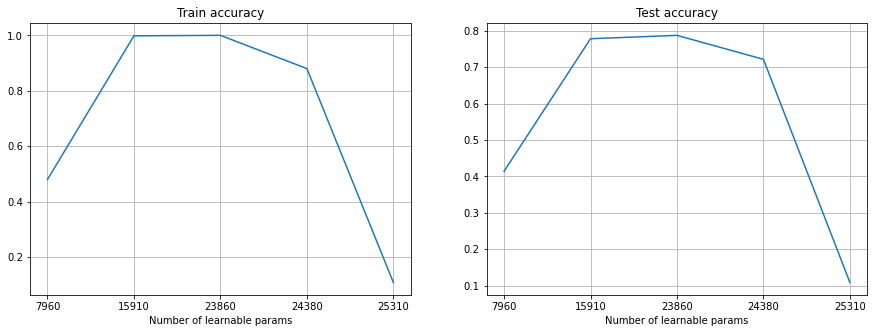

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []

for hl_size in hl_sizes:
    print(hl_size)
    print('Training MLP of size {} ...'.format(hl_size))
    
    #mlp=
    mlp = MLPClassifier(hidden_layer_sizes=hl_size, max_iter=300, alpha=1e-4, solver='sgd',  #now 300 as ma_iter
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1) 

    mlp.fit(X_train,y_train) 
        
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course


## [ANSWER TO QUESTION 2]

The two plots represent the train and test accuracies as a function of the number of learnable parameters in your neural network: in both cases the accuracy increases with a larger number of learnable parameter but after a certain number it decreases. This trend can be connected to the problem of underfitting and overfitting. 
With a smaller number of learnable parameters we are in the case of underfitting: both train and test accuracy are low, we are taking into account a overly too simplistic model. Increasing the number of learnable parameters, (eg 23860), we obtain a higher training and test accuracy, being therefore in an optimal case. An even larger number of learnable parameters may instead leads to overfitting, this usually means that the model knows the training data way too well but will perform poorly on the test set, not being able to generalize. In our case however both the train accuracy and test accuracy are low, so we can suppose an underfitting situation again.  





### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

In [11]:
import matplotlib.pyplot as plt
import operator

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
scores = [] #{} changed as []

#ADD YOUR CODE

##best NN architecture (20,) and batch size {'batch_size': 480}
parameters = {'learning_rate_init': lr_list}

mlp= MLPClassifier(hidden_layer_sizes=(20,),batch_size=480, max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID)
                    #learning_rate_init=lr_list)  #lr_list as new learning rate 

grid_lr = GridSearchCV(mlp, parameters, n_jobs=-1, cv=5) #check n_jobs=-1
grid_lr.fit(X_train,y_train)
result_lr_df = pd.DataFrame(grid_lr.cv_results_)

#print(result_lr_df)
#scores.append(grid_lr.best_score_)  

  
print ('\nRESULTS FOR NN\n')

print("Best parameters set found:",grid_lr.best_params_ ) #ADD YOUR CODE

print("Score with best parameters:", "{0:0.3f}".format(grid_lr.best_score_)) #ADD YOUR CODE



RESULTS FOR NN

Best parameters set found: {'learning_rate_init': 0.01}
Score with best parameters: 0.748


/home/sabrina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


/home/sabrina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sabrina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


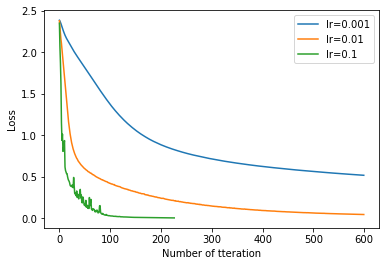

In [12]:
##Plot the learning curves (i.e., the variation of the loss over the steps,
#you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate
 
for lr in lr_list:
    mlp= MLPClassifier(hidden_layer_sizes=(20,),batch_size=480, max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lr)
    mlp.fit(X_train,y_train)
    plt.plot(mlp.loss_curve_, label="lr="+str(lr))
    
plt.legend()
plt.xlabel("Number of tteration")
plt.ylabel("Loss")
plt.show()

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?


## [ANSWER TO QUESTION 3]

The plot shows us the learning curve for three different learning rates: with a lower learning rate (lr=0.001) the curve is more stable but decreases very slowly, if instead we use higher values of the learning rates the curve will converge faster but it will also become more unstable as we can clearly see for lr=0.1 (green curve)


### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.222000


/home/sabrina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


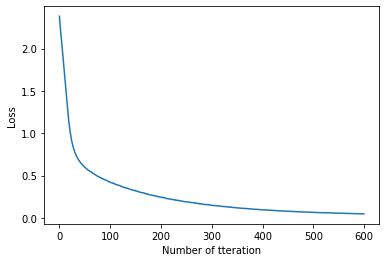

In [13]:
#get training and test error for the best NN model from CV

##best NN architecture (20,),  batch size {'batch_size': 480}, and learning rate {'learning_rate_init': 0.01}
mlp= MLPClassifier(hidden_layer_sizes=(20,),batch_size=480, max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, 
                    learning_rate_init=0.01) 

#ADD YOUR CODE
mlp.fit(X_train,y_train)

train_score= mlp.score(X_train , y_train) 
training_error=1-train_score

test_score=mlp.score(X_test , y_test)
test_error=1-test_score


print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
plt.plot(mlp.loss_curve_)
plt.xlabel("Number of tteration")
plt.ylabel("Loss")
plt.show()

##### More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [380 397 418 396 409 380 396 397 427 400]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [15]:
# use best architecture and params from before

##best NN architecture (20,),  batch size {'batch_size': 480}, and learning rate {'learning_rate_init': 0.01}

#ADD YOUR CODE
mlp_large= MLPClassifier(hidden_layer_sizes=(20,),batch_size=480, max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,  #max_iter reduced for lower computational time 
                    learning_rate_init=0.01) #verbose=True removed for simpler visualization of the result 


#get training and test error for the NN
mlp_large.fit(X_train,y_train)
mlp_large.predict(X_test)

train_score= mlp_large.score(X_train , y_train) 
training_error=1-train_score

test_score=mlp_large.score(X_test , y_test)
test_error=1-test_score
#ADD YOUR CODE
print("\n")

print ('\nRESULTS FOR NN\n')
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


/home/sabrina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(





RESULTS FOR NN

NN training error: 0.050500
NN test error: 0.172000


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

The results in the two different cases are:

-Best NN with m=600 <br>
Best NN training error: 0.02 <br>
Best NN test error: 0.22 <br>

-NN with m=4000 <br>
NN training error: 0.05 <br>
NN test error: 0.17 <br>



<br>
From this results we can clearly see that increasing the number of training sample leads to a smaller error: in the first case with m=600 the test error is equal to 22% while with m=4000 it gets smaller and it's equal to 17%.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


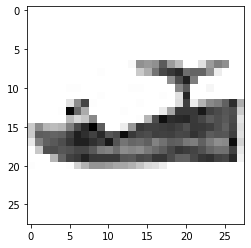

LABEL: 5
Index of the first missclassified item by NN with m=600 and correctly classified by NN with m=4000: 18
Missclassified by NN with m=600 as label: 7


In [16]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

#ADD YOUR CODE
#item misscl by NN m=600 and correctly class by NN m=4000
for i in range(0,len(y_test)):
    if y_test[i] != NN_prediction[i] and y_test[i] == large_NN_prediction[i]:  #risultati predicr
        plot_input(X_test,y_test,i)
        print("Index of the first missclassified item by NN with m=600 and correctly classified by NN with m=4000:", i)
        print("Missclassified by NN with m=600 as label:", NN_prediction[i])
        break
    


### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


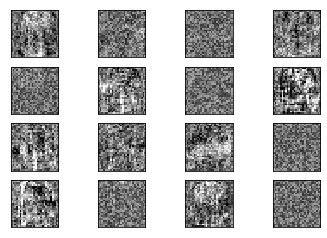

Weights with 4000 data points:


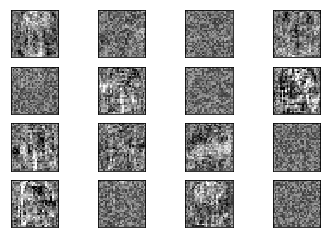

In [17]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()


## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

Looking the plot of the internal weights both in the case with m=600 and m=4000 it’s very difficult to distinguish an object of our sample, even the shape it's hard to guess: the plot is dominated by noise, so we mainly observe only that.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [18]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

#ADD YOUR CODE
svc_g = SVC(kernel='rbf')
SVM = GridSearchCV(estimator=svc_g, param_grid={'C': [5], 'gamma': [0.005]}, cv=4) 
#The best SVM model taken is rbf with {'C': 5, 'gamma': 0.005} as best parameters

SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

#train
SVM_train_score=SVM.best_estimator_.score(X_train , y_train)
SVM_training_error =(1-SVM_train_score)

print("Training score SVM:")
print(SVM_training_error)

#test
SVM_test_score=SVM.best_estimator_.score(X_test , y_test)
SVM_test_error = (1-SVM_test_score) #ADD YOUR CODE
print("Test score SVM:")
print(SVM_test_error)


RESULTS FOR SVM
Training score SVM:
0.0716
Test score SVM:
0.13280000000000003


In [19]:
from sklearn import linear_model

#regL2 = #ADD YOUR CODE

# you can re-use your code from Lab 2

#ADD YOUR CODE
log_regC=linear_model.LogisticRegression(C=1,max_iter=800) 

#training set
training_reg=log_regC.fit(X_train, y_train) #learn
training_pred=log_regC.predict(X_train) #predict
training_score=log_regC.score(X_train, y_train)
training_error=1-training_score

#test set
#pred_test = log_regC.predict(X_test)
test_score=log_regC.score(X_test,y_test)
test_error=1-test_score

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)



RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.043800
Test error (reg): 0.172600


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]


The results obtained of Logistic Regression, SVM and NN are:

-NN with m=4000 <br>
NN training error: 0.05 <br>
NN test error: 0.17 <br>
<br>

-SVM <br> 
Training score:0.07 <br>
Test score: 0.13 <br>
<br>

-Logistic Regression <br>
Training error: 0.04 <br>
Test error: 0.17 <br>

<br>
The best result it's obtaneid with the SVM model which yields a test error of 13%, the others two models have instead a test error of 17% for Neural Network and a test error of 17% for the Logistric Regression case, which comparable with the previous one.

